## Import part

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('gsearch_jobs_fixed.csv')

In [142]:
## load big dataset
# chunk_size = 10000  
# chunks = []  
# for chunk in pd.read_csv('gsearch_jobs_fixed1m.csv', chunksize=chunk_size):
#     chunks.append(chunk)
# df = pd.concat(chunks, ignore_index=True)
# # df = pd.concat(chunks)

## observation part

In [129]:
print(len(df))
df.iloc[0,5]

34153


'Job Summary: The Data Analyst oversees data production for the Wildland Fire program and ensures the quality of the data produced. This position is on site and works in the Chloeta Catastrophe Command Center (Cat Center) alongside a variety of technical disciplines. Supervisory Responsibilities: No Job Classification: Permanent, full-time employee with benefits Compensation: Non-exempt $19 - 39 per hour Chloeta reserves the right to offer any candidate above or below the listed compensation amount based on experience or business needs.\n\nDuties/Responsibilities: Oversees and manages assigned project and/or department data, ensuring it meets predetermined contractual or policy requirements. Serves as the point person for data-related tasks on assigned projects. Coordinates the production of data by the assigned department and by other data developers.\n\nReviews customer requests for quotes and statements of work and compares these with contractual data requirements. Reviews prepared 

In [8]:
df.iloc[:,11:21].head()

,work_from_home,salary,search_term,date_time,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max
0,NaN,NaN,data analyst,8/3/2023 3:00,NaN,NaN,NaN,NaN,NaN,NaN
1,True,NaN,data analyst,8/3/2023 3:00,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,data analyst,8/3/2023 3:00,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,data analyst,8/3/2023 3:00,NaN,NaN,NaN,NaN,NaN,NaN
4,True,NaN,data analyst,8/3/2023 3:00,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.iloc[:,21:].head()

,salary_hourly,salary_yearly,salary_standardized,description_tokens,search_location
0,NaN,NaN,NaN,"['r', 'python']",United States
1,NaN,NaN,NaN,"['r', 'matlab', 'python', 'mongodb', 'pandas',...",United States
2,NaN,NaN,NaN,[],United States
3,NaN,NaN,NaN,"['word', 'excel', 'r', 'tableau', 'perl', 'pyt...",United States
4,NaN,NaN,NaN,[],United States


## data manipulation and calculation part

#### SQL

In [14]:
import mysql.connector

dataBase1 = mysql.connector.connect(
host ="localhost",
user ="root",
passwd ="",
database = "jobs3"
)

dataBase2 = mysql.connector.connect(
host ="localhost",
user ="root",
passwd ="",
database = "jobs4"
)

# preparing a cursor object
cursorObject1 = dataBase1.cursor(buffered=True)
cursorObject2 = dataBase2.cursor(buffered=True)


In [15]:
results_temp = {}

In [16]:
cursorObject1.execute('SET profiling = 1;')
cursorObject2.execute('SET profiling = 1;')

In [17]:
sql1_1 = "SELECT * FROM job_posts WHERE title = 'Data Analyst';"
sql1_2 = "SELECT * FROM job_posts WHERE description IN ('Data Analyst');"
sql1_3 = "SELECT * FROM job_posts WHERE description LIKE '%Data Analyst%';"
sql1_4 = "SELECT * FROM job_posts WHERE description REGEXP 'Data Analyst';"

sql2_1 = "SELECT * FROM job_posts WHERE title = 'Data Analyst';"
sql2_2 = "SELECT * FROM job_posts WHERE title IN ('Data Analyst');"
sql2_3 = "SELECT * FROM job_posts WHERE title LIKE '%Data Analyst%';"
sql2_4 = "SELECT * FROM job_posts WHERE title REGEXP 'Data Analyst';"

sql3_1 = "SELECT * FROM job_posts WHERE title = 'Data Analyst';"
sql3_2 = "SELECT * FROM job_posts WHERE description IN ('Data Analyst');"
sql3_3 = "SELECT * FROM job_posts WHERE description LIKE '%Data Analyst%';"
sql3_4 = "SELECT * FROM job_posts WHERE description REGEXP 'Data Analyst';"

sql4_1 = "SELECT * FROM job_posts WHERE title = 'Data Analyst';"
sql4_2 = "SELECT * FROM job_posts WHERE title IN ('Data Analyst');"
sql4_3 = "SELECT * FROM job_posts WHERE title LIKE '%Data Analyst%';"
sql4_4 = "SELECT * FROM job_posts WHERE title REGEXP 'Data Analyst';"

sql5_1 = "SELECT * FROM job_posts WHERE description <> '%Data Analyst%';"
sql5_2 = "SELECT * FROM job_posts WHERE title = 'Data Analyst' OR description = 'Data Analyst';"
sql5_3 = "SELECT * FROM job_posts WHERE title = 'Data Analyst' AND description = 'Data Analyst';"

sql5_4 = "SELECT * FROM job_posts WHERE description NOT LIKE '%Data Analyst%';"
sql5_5 = "SELECT * FROM job_posts WHERE title LIKE '%Data Analyst%' OR description LIKE '%Data Analyst%';"
sql5_6 = "SELECT * FROM job_posts WHERE title LIKE '%Data Analyst%' AND description LIKE '%Data Analyst%';"

sql5_7 = "SELECT * FROM job_posts WHERE title NOT REGEXP 'Data Analyst';"
sql5_8 = "SELECT * FROM job_posts WHERE title REGEXP 'Data Analyst' OR description REGEXP 'Data Analyst';"
sql5_9 = "SELECT * FROM job_posts WHERE title REGEXP 'Data Analyst' AND description REGEXP 'Data Analyst';"

sql5_10 = "SELECT * FROM job_posts WHERE title REGEXP 'Data Analyst|software engineer';"
sql5_11 = "SELECT * FROM job_posts WHERE title REGEXP 'Data Analyst.*software engineer';"
sql5_12 = "SELECT * FROM job_posts WHERE title REGEXP 'Data Analyst' OR title REGEXP 'software engineer';"
sql5_13 = "SELECT * FROM job_posts WHERE title REGEXP 'Data Analyst' AND title REGEXP 'software engineer';"

sql6_1 = "SELECT title, company_name, location FROM job_posts WHERE title = 'Data Analyst';"
sql6_2 = "SELECT title, company_name, location FROM job_posts WHERE title LIKE '%Data Analyst%';"
sql6_3 = "SELECT title, company_name, location FROM job_posts WHERE title REGEXP 'Data Analyst';"

sql7_1  = "SELECT * FROM job_posts WHERE description REGEXP 'Job [a-zA-Z ]*[^a-zA-Z][a-zA-Z ]*Data Analyst';"
sql7_2 = "SELECT * FROM job_posts WHERE description REGEXP '(Job [a-zA-Z ]*[^a-zA-Z][a-zA-Z ]*(d|D)ata (a|A)nalyst.*(j|J)ob (c|C)lassification[^a-zA-Z].*full.time|(c|C)ompensation:[a-zA-Z ]*(N|n)on[^a-zA-Z ][a-zA-Z ]*$\b(1[0-9])\b[^a-zA-Z ]*([3-9][0-9]))';"


# var_name = 'sql7_1'
# print(globals()[var_name])

for i in range(1,3):
    for j in range(1,5):
        results = []
        for _ in range(30):
            cursorObject1.execute(globals()[f'sql{i}_{j}'])
            cursorObject1.execute('SHOW PROFILES;')
            result = cursorObject1.fetchall()[-1][1]
            results.append(result)
        results_temp[f'{i}_{j}'] = results

for i in range(3,5):
    for j in range(1,5):
        results = []
        for _ in range(30):
            cursorObject2.execute(globals()[f'sql{i}_{j}'])
            cursorObject2.execute('SHOW PROFILES;')
            result = cursorObject2.fetchall()[-1][1]
            results.append(result)
        results_temp[f'{i}_{j}'] = results

for i in range(5,6):
    for j in range(1,14):
        results = []
        for _ in range(30):
            cursorObject2.execute(globals()[f'sql{i}_{j}'])
            cursorObject2.execute('SHOW PROFILES;')
            result = cursorObject2.fetchall()[-1][1]
            results.append(result)
        results_temp[f'{i}_{j}'] = results

for i in range(6,7):
    for j in range(1,4):
        results = []
        for _ in range(30):
            cursorObject2.execute(globals()[f'sql{i}_{j}'])
            cursorObject2.execute('SHOW PROFILES;')
            result = cursorObject2.fetchall()[-1][1]
            results.append(result)
        results_temp[f'{i}_{j}'] = results

for i in range(7,8):
    for j in range(1,3):
        results = []
        for _ in range(30):
            cursorObject2.execute(globals()[f'sql{i}_{j}'])
            cursorObject2.execute('SHOW PROFILES;')
            result = cursorObject2.fetchall()[-1][1]
            results.append(result)
        results_temp[f'{i}_{j}'] = results


print(results_temp)
# for row in results:
#     print(row)

{'1_1': [25.7277782, 24.0558356, 23.7178239, 22.9257038, 24.3563975, 23.0665105, 22.8812144, 22.9287325, 22.8510791, 22.7922177, 23.1909296, 22.5802242, 23.0822712, 22.9682029, 22.9956061, 22.7375825, 22.5271881, 22.9334348, 23.0457023, 23.0493308, 22.7366223, 23.2653133, 22.7950765, 23.0813332, 22.6372519, 22.982334, 22.8410619, 22.6938401, 22.7718191, 22.5084276], '1_2': [20.5238828, 20.6053091, 20.5966548, 20.3319542, 20.4618106, 20.3850469, 20.4918985, 21.1574866, 20.4192858, 20.850557, 20.2937606, 21.165571, 20.7979844, 20.3959651, 20.8827877, 22.5032687, 20.518911, 20.3989036, 20.8815453, 20.3938258, 20.539382, 20.9418098, 20.3211966, 20.7596711, 20.9164477, 20.4505672, 20.8443832, 20.6264177, 20.4615271, 20.5383176], '1_3': [29.4404778, 29.4728307, 28.9116365, 28.9584352, 29.1369501, 30.6980868, 29.5363967, 29.2081565, 29.1317322, 28.9332264, 28.8925158, 28.907121, 28.9646874, 29.2482716, 29.1163512, 28.7018328, 28.9270063, 29.0586698, 29.1758721, 28.982872, 29.0295389, 29.00727

In [18]:
# write the data into xlsx file.

## Caution!! Sometimes the code cannot run properly when create the xlsx file, recommand you fist create the file in the folder where your notebook is, and with the name of your file_name. And then run this cell.

## if you do not know the path, you can run the code below:
# import os
# os.getcwd()

# export the data 
df = pd.DataFrame(results_temp)
file_name = 'Final_data_temp_version2.xlsx' 
sheet_name = 'mysql'

with pd.ExcelWriter(file_name, engine='openpyxl', mode='a') as writer: 
    df.to_excel(writer, sheet_name=sheet_name, index=False)

In [104]:
# print(len(results))
# print(results_temp)

30
{'2_1': [23.486208, 23.5464183, 23.6047905, 23.326783, 23.2041084, 23.5167422, 23.2144701, 23.4025123, 23.8768397, 23.4097698, 23.5593348, 23.7699243, 23.5054028, 23.0516048, 23.5731848, 23.4264016, 24.059889, 23.246063, 23.483651, 23.4378564, 23.4450959, 23.9085963, 23.6364069, 23.4774235, 23.3406286, 23.4958421, 23.859897, 23.5667177, 23.2637782, 23.4625975], '2_2': [23.2146577, 23.3039669, 23.6743402, 23.4393634, 23.5520398, 23.6538251, 24.0079107, 23.4127356, 23.3319688, 23.2369617, 23.2866405, 23.5430996, 23.1300862, 23.7779437, 23.1463013, 23.5155885, 23.223267, 23.3270412, 23.9601978, 23.4721059, 23.815954, 23.4045426, 23.5038986, 23.073744, 23.8073007, 23.2288427, 23.5594326, 23.1990272, 23.2179561, 23.5730064], '2_3': [31.6637238, 30.457967, 31.1364729, 30.78395, 30.4197308, 31.3044397, 30.7769967, 30.524285, 30.6201956, 34.8077187, 31.0874964, 30.5741483, 30.8189501, 30.7131041, 32.0097944, 30.4829847, 30.9251549, 30.9719188, 31.1005041, 30.6406518, 31.0109199, 30.6476855,

In [12]:
# Disconnecting from server, you can just disconnect from your xmapp.

# cursorObject1.execute('SET profiling = 0;')
# cursorObject2.execute('SET profiling = 0;')
cursorObject1.close()
dataBase1.close()
cursorObject2.close()
dataBase2.close()

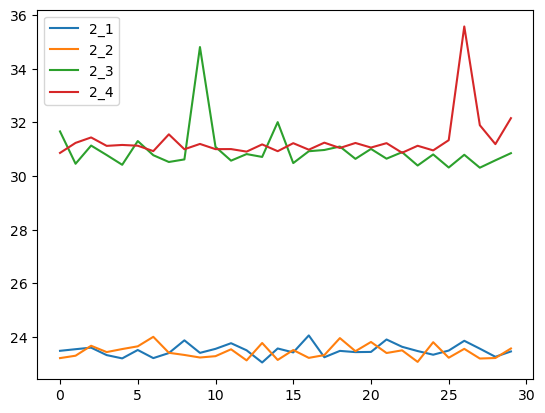

In [107]:
import matplotlib.pyplot as plt
for key, value in results_temp.items():
    plt.plot(results_temp[key], label = key)
plt.legend()    
plt.show()

#### MongoDB

##### remember to %pip install pymongo

In [19]:
# %pip install pymongo

## And then import the database and collection
import pymongo
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["Jobs"]
collection = db["job_posts2"]

from math import *

In [20]:
## define the average function
def avg(x):
    return sum(x)/len(x)

In [21]:
## define the queries and empty results
class MyFunctions:
    def query_M1(self):
        return db.job_posts2.find({'description' : 'Data Analyst'}).explain()['executionStats']['executionTimeMillis']
    def query_M2(self):
        return db.job_posts2.find({'description' : { '$in': ['Data Analyst']}}).explain()['executionStats']['executionTimeMillis']
    def query_M3(self):
        return db.job_posts2.find({'description': {'$regex': 'Data Analyst'}}).explain()['executionStats']['executionTimeMillis']
    def query_M4(self):
        return db.job_posts2.find({'title' : 'Data Analyst'}).explain()['executionStats']['executionTimeMillis']
    def query_M5(self):
        return db.job_posts2.find({'title' : { '$in': ['Data Analyst']}}).explain()['executionStats']['executionTimeMillis']
    def query_M6(self):
        return db.job_posts2.find({'title' : {'$regex': 'Data Analyst'}}).explain()['executionStats']['executionTimeMillis']
    def query_M7(self):
        return db.job_posts2.find({'title' : {'$not' : {'$eq':'Data Analyst'}}}).explain()['executionStats']['executionTimeMillis']
    def query_M8(self):
        return db.job_posts2.find({'title' : {'$not' : {'$regex': 'Data Analyst'}}}).explain()['executionStats']['executionTimeMillis']
    def query_M9(self):
        return db.job_posts2.find({'$or' : [{'title' : 'Data Analyst'} , {'description' : 'Data Analyst'}]}).explain()['executionStats']['executionTimeMillis']
    def query_M10(self):
        return db.job_posts2.find({'$or' : [{'title' : {'$regex': 'Data Analyst'}} , {'description' : {'$regex': 'Data Analyst'}}]}).explain()['executionStats']['executionTimeMillis']
    def query_M11(self):
        return db.job_posts2.find({'$and' : [{'title' : 'Data Analyst'} , {'description' : 'Data Analyst'}]}).explain()['executionStats']['executionTimeMillis']
    def query_M12(self):
        return db.job_posts2.find({'$and' : [{'title' : {'$regex': 'Data Analyst'}} , {'description' : {'$regex': 'Data Analyst'}}]}).explain()['executionStats']['executionTimeMillis']
    def query_M13(self):
        return db.job_posts2.find({'title' : {'$regex': 'Data Analyst|software engineer'}}).explain()['executionStats']['executionTimeMillis']
    def query_M14(self):
        return db.job_posts2.find({'title' : {'$regex': 'Data Analyst.*software engineer'}}).explain()['executionStats']['executionTimeMillis']
    def query_M15(self):
        return db.job_posts2.find({'$or' : [{'title' : {'$regex': 'Data Analyst'}} , {'title' : {'$regex': 'software engineer'}}]}).explain()['executionStats']['executionTimeMillis']
    def query_M16(self):
        return db.job_posts2.find({'$and' : [{'title' : {'$regex': 'Data Analyst'}} , {'title' : {'$regex': 'software engineer'}}]}).explain()['executionStats']['executionTimeMillis']
    def query_M17(self):
        return db.job_posts2.find({'title' : 'Data Analyst'},{'title':1, 'company_name':1, 'location':1 }).explain()['executionStats']['executionTimeMillis']
    def query_M18(self):
        return db.job_posts2.find({'title' : {'$regex': 'Data Analyst'}},{'title':1, 'company_name':1, 'location':1 }).explain()['executionStats']['executionTimeMillis']
    def query_M19(self):
        return db.job_posts2.find({'description': {'$regex': 'Job [a-zA-Z ]*[^a-zA-Z][a-zA-Z ]*Data Analyst'}}).explain()['executionStats']['executionTimeMillis']
    def query_M20(self):
        return db.job_posts2.find({'description': {'$regex': '(Job [a-zA-Z ]*[^a-zA-Z][a-zA-Z ]*(d|D)ata (a|A)nalyst.*(j|J)ob (c|C)lassification[^a-zA-Z].*full.time|(c|C)ompensation:[a-zA-Z ]*(N|n)on[^a-zA-Z ][a-zA-Z ]*$\b(1[0-9])\b[^a-zA-Z ]*([3-9][0-9]))'}}).explain()['executionStats']['executionTimeMillis']

query = {}
for i in range(1,21):
    query['M'+str(i)] = 'query_M'+ str(i)
results = {}
for key, value in query.items():
    results[key] = []

print(query,'\n',results)
T =  getattr(MyFunctions(), query['M4'])()
print(T)


{'M1': 'query_M1', 'M2': 'query_M2', 'M3': 'query_M3', 'M4': 'query_M4', 'M5': 'query_M5', 'M6': 'query_M6', 'M7': 'query_M7', 'M8': 'query_M8', 'M9': 'query_M9', 'M10': 'query_M10', 'M11': 'query_M11', 'M12': 'query_M12', 'M13': 'query_M13', 'M14': 'query_M14', 'M15': 'query_M15', 'M16': 'query_M16', 'M17': 'query_M17', 'M18': 'query_M18', 'M19': 'query_M19', 'M20': 'query_M20'} 
 {'M1': [], 'M2': [], 'M3': [], 'M4': [], 'M5': [], 'M6': [], 'M7': [], 'M8': [], 'M9': [], 'M10': [], 'M11': [], 'M12': [], 'M13': [], 'M14': [], 'M15': [], 'M16': [], 'M17': [], 'M18': [], 'M19': [], 'M20': []}
10152


In [22]:
for key, value in query.items():
    for j in range(30):
        result = getattr(MyFunctions(), value)()
        # print(result)
        results[key].append(result)
print(avg(results['M1']))
print(results)

282.3
{'M1': [339, 310, 326, 281, 293, 272, 276, 311, 280, 268, 278, 280, 270, 269, 268, 278, 290, 270, 276, 280, 272, 276, 279, 269, 270, 290, 277, 274, 269, 278], 'M2': [309, 269, 264, 283, 270, 273, 276, 275, 273, 261, 276, 268, 280, 265, 276, 265, 261, 274, 267, 267, 263, 270, 263, 264, 263, 296, 265, 265, 269, 281], 'M3': [3140, 4046, 3559, 3217, 3045, 3297, 3008, 2941, 2985, 2964, 2935, 2942, 2958, 2977, 3188, 2950, 2949, 2887, 2896, 3060, 2921, 2950, 2935, 2932, 2959, 2950, 3346, 2901, 2924, 2932], 'M4': [266, 251, 257, 269, 255, 260, 256, 269, 258, 259, 264, 269, 256, 265, 270, 263, 257, 258, 275, 265, 257, 265, 277, 262, 262, 259, 269, 261, 258, 274], 'M5': [265, 266, 253, 270, 256, 260, 278, 271, 258, 257, 260, 278, 256, 257, 260, 276, 266, 256, 273, 258, 273, 262, 403, 509, 301, 264, 264, 261, 272, 259], 'M6': [551, 894, 694, 562, 553, 592, 539, 564, 545, 606, 601, 541, 553, 549, 569, 539, 567, 534, 576, 566, 557, 566, 533, 589, 835, 553, 548, 552, 557, 573], 'M7': [320, 292

In [23]:

import pandas as pd
df = pd.DataFrame(results)
file_name = 'Final_data_temp_version2.xlsx' 
sheet_name = 'MongoDB'

with pd.ExcelWriter(file_name, engine='openpyxl', mode='a') as writer: 
    df.to_excel(writer, sheet_name=sheet_name, index=False)

## export part

In [91]:
# import os
# os.getcwd()

'e:\\personal\\Textbook_and_others\\6102 Data Warehousing\\Final_Project'

In [90]:
## export the mongoDB query results to xlsx
# df = pd.DataFrame(results)

# file_name = 'output1.xlsx' 
# sheet_name = 'MongoDB'

# with pd.ExcelWriter(file_name, engine='openpyxl', mode='a') as writer: 
#     df.to_excel(writer, sheet_name=sheet_name, index=False)